In [1]:
import itertools
import sys
sys.path.append("../")
from pomps.policy_scope import PolicyComponent, MixedPolicyScope
from pomis.scm import *
import networkx as nx
from pomps.contextual_graphs import *
from pomps.policy_scope import *
from pomps.gp_fcm import *
from pomps.controllers import *
import pyro
import torch
from tqdm.auto import tqdm
import pyro.distributions as dist
from pomps.fcm import *
import seaborn as sns
import matplotlib.pyplot as plt
# from pomis.optimiser import CausalOptimiser, Objective, SCM
from pomis.scm import BoolDomain, SCM
import seaborn as sns
from experiments.causal_bo_experiment import CaBOExperiment, OptimizationObjective
from experiments.pomps_experiment import POMPSExperiment, OptimizationObjective
from experiments.scms import aspirin_statin_het as environ

In [2]:
smoke_test=True
experiment_name = 'test_cobo_imp'

n_iter = 150
exp = CaBOExperiment(environ.fcm, {"bmi", "age", "cancer"},
                         environ.domain, "Y", n_iter=16 if smoke_test else n_iter,debug=True,
                         experiment_name=experiment_name, objetive=OptimizationObjective.minimize)

In [3]:
exp.policies_active[0][1].acq_vals

In [4]:
exp.policies_active[1][1].acq_vals

In [5]:
exp.policies_active[1][1].functional.optimizer

In [8]:
exp.iterate(smoke_test=smoke_test)

  0%|          | 0/16 [00:00<?, ?it/s]

(array([[-0.80749732],
       [-0.77743298],
       [ 1.40132415]]),)
('Optimal indexes [2]',)
("Policy for {'aspirin'}, set()",)
('Trial index 2',)
[-0.711788]
    aspirin            __AC_VAL
0  0.075035  [-0.7117879986763]
("Sample is {'bmi': tensor(27.9596), 'aspirin': 0.07503477395668769, 'age': tensor(67.0491), 'statin': tensor(0.3311), 'cancer': tensor(0.1314), 'Y': tensor(0.0341)}",)
(array([[-0.80749732],
       [-0.77743298],
       [ 0.711788  ]]),)
('Optimal indexes [2]',)
("Policy for {'aspirin'}, set()",)
('Trial index 2',)
Warning - optimization restart 10/10 failed
[-0.98895401]
    aspirin               __AC_VAL
0  0.034872  [-0.9889540076255798]
("Sample is {'bmi': tensor(26.8053), 'aspirin': 0.034871550611138946, 'age': tensor(55.2341), 'statin': tensor(0.1076), 'cancer': tensor(0.0122), 'Y': tensor(-0.0038)}",)
(array([[-0.80749732],
       [-0.77743298],
       [ 0.98895401]]),)
('Optimal indexes [2]',)
("Policy for {'aspirin'}, set()",)
('Trial index 2',)
[-0.07084

ValueError: 'a' cannot be empty unless no samples are taken

In [12]:
exp.policies_active[2][1].functional.optimizer.X

,aspirin
0,0.000000e+00
1,5.000000e-01
2,1.199930e-04
3,6.723360e-10
4,1.101333e-09
5,1.174089e-02
6,2.994392e-02
7,2.172292e-04
8,9.179732e-02
9,1.522714e-02


In [16]:
from experiments.visualizer import Visualizer

In [17]:
vis = Visualizer('../experiment_results/', 'homogen_aspirin_statin_cbo', 5.075)

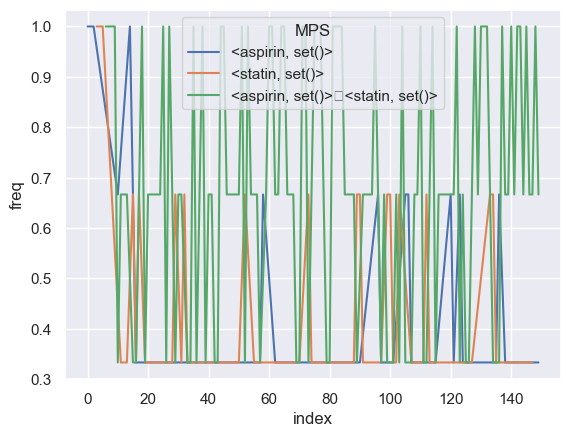

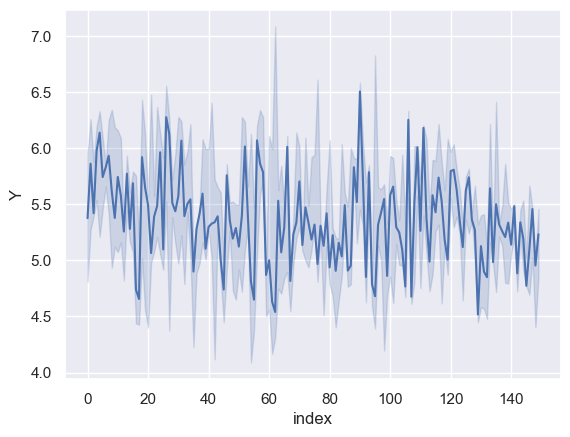

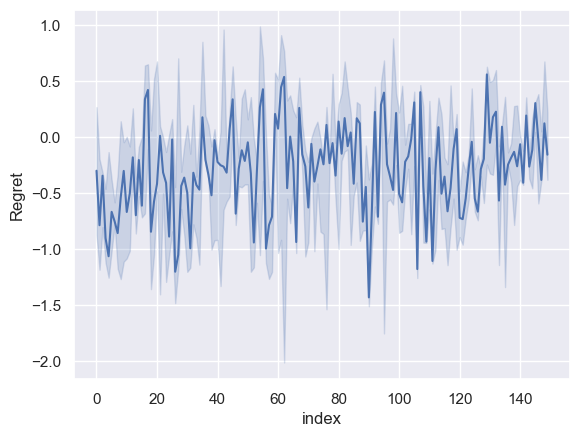

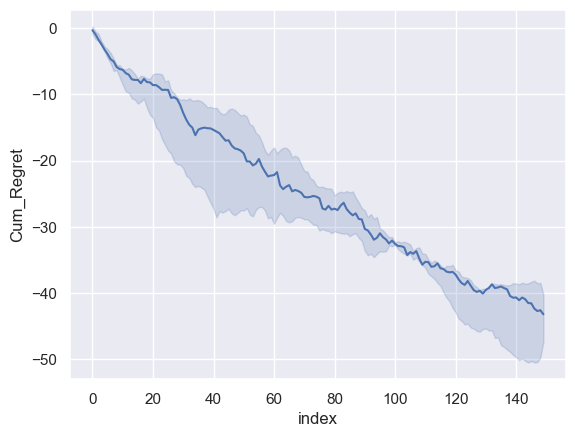

In [18]:
vis.summary()

In [19]:
cabo.pomps_active[0][0].functors['aspirin'].functional.optimizer.best_x

AttributeError: 'CaBOExperiment' object has no attribute 'pomps_active'

In [13]:
cabo.pomps_active[1][0].functors['statin'].functional.optimizer.best_x

,aspirin,statin
45,0.181429,0.84594


In [14]:
cabo.pomps_active[1][0].functors['statin'].functional.optimizer.best_y

3.5387723445892334

In [15]:
cabo.pomps_active[2][0].functors['statin'].functional.optimizer.best_x

,statin
5,0.999247


In [16]:
cabo.pomps_active[2][0].functors['statin'].functional.optimizer.best_y

4.219493389129639

In [ ]:
cabo.pomps_active[0][0].functors['aspirin'].functional.optimizer.best_y

In [42]:
cabo.pomps_active[0][0].functors['aspirin'].functional.optimizer.best_y

4.140915393829346

In [19]:
combinded_df[['MPS', 'Y']].groupby("MPS").agg('mean')

,Y
MPS,
"<aspirin, set()>",5.725353
"<statin, set()>",5.429952
"<statin, set()>\t<aspirin, set()>",5.375244


In [ ]:
se